# Import modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Read data source file

In [2]:

df = pd.read_csv("./case1201.csv")
df.head(8)

,State,SAT,Takers,Income,Years,Public,Expend,Rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5
5,Montana,1033,8,263,15.91,93.7,29.48,86.4
6,Minnesota,1028,7,343,17.41,78.3,24.84,83.4
7,Utah,1022,4,333,16.57,75.2,17.42,85.9


# Check information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
State     50 non-null object
SAT       50 non-null int64
Takers    50 non-null int64
Income    50 non-null int64
Years     50 non-null float64
Public    50 non-null float64
Expend    50 non-null float64
Rank      50 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.2+ KB


In [4]:
total_records, column_len = df.shape
(column_len, total_records)

(8, 50)

In [5]:
df.describe()

,SAT,Takers,Income,Years,Public,Expend,Rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,947.940000,26.220000,293.980000,16.209200,81.204000,22.965600,79.988000
std,70.856397,22.022521,43.693034,0.699982,9.830917,6.144932,6.523072
min,790.000000,2.000000,208.000000,14.390000,44.800000,13.840000,69.800000
25%,889.250000,6.250000,261.500000,15.910000,76.925000,19.592500,74.025000
50%,966.000000,16.000000,295.000000,16.360000,80.800000,21.610000,80.850000
75%,998.500000,47.750000,325.000000,16.757500,88.250000,26.387500,85.825000
max,1088.000000,69.000000,401.000000,17.410000,97.000000,50.100000,90.600000


In [6]:
mode_values = [df['SAT'].mode(), df['Takers'].mode(), df['Income'].mode()]
mode_values

[0     888
 1     889
 2     896
 3     975
 4     999
 5    1045
 dtype: int64, 0    5
 dtype: int64, 0    277
 1    293
 2    295
 3    330
 4    333
 dtype: int64]

In [7]:
## null checking
df.isnull().any().any()

False

# Check tied values

In [8]:
def show_count(grouped, threshold):
    dg = grouped.size().to_frame('count')
    print(dg[dg['count'] > threshold])

In [9]:
show_count(df[['Takers']].groupby(['Takers']), 1)

        count
Takers       
3           3
4           2
5           5
6           2
7           3
8           2
10          3
16          2
47          2
48          2
50          2
59          2


In [10]:
show_count(df[['Takers']].groupby(['Takers']), 1)

        count
Takers       
3           3
4           2
5           5
6           2
7           3
8           2
10          3
16          2
47          2
48          2
50          2
59          2


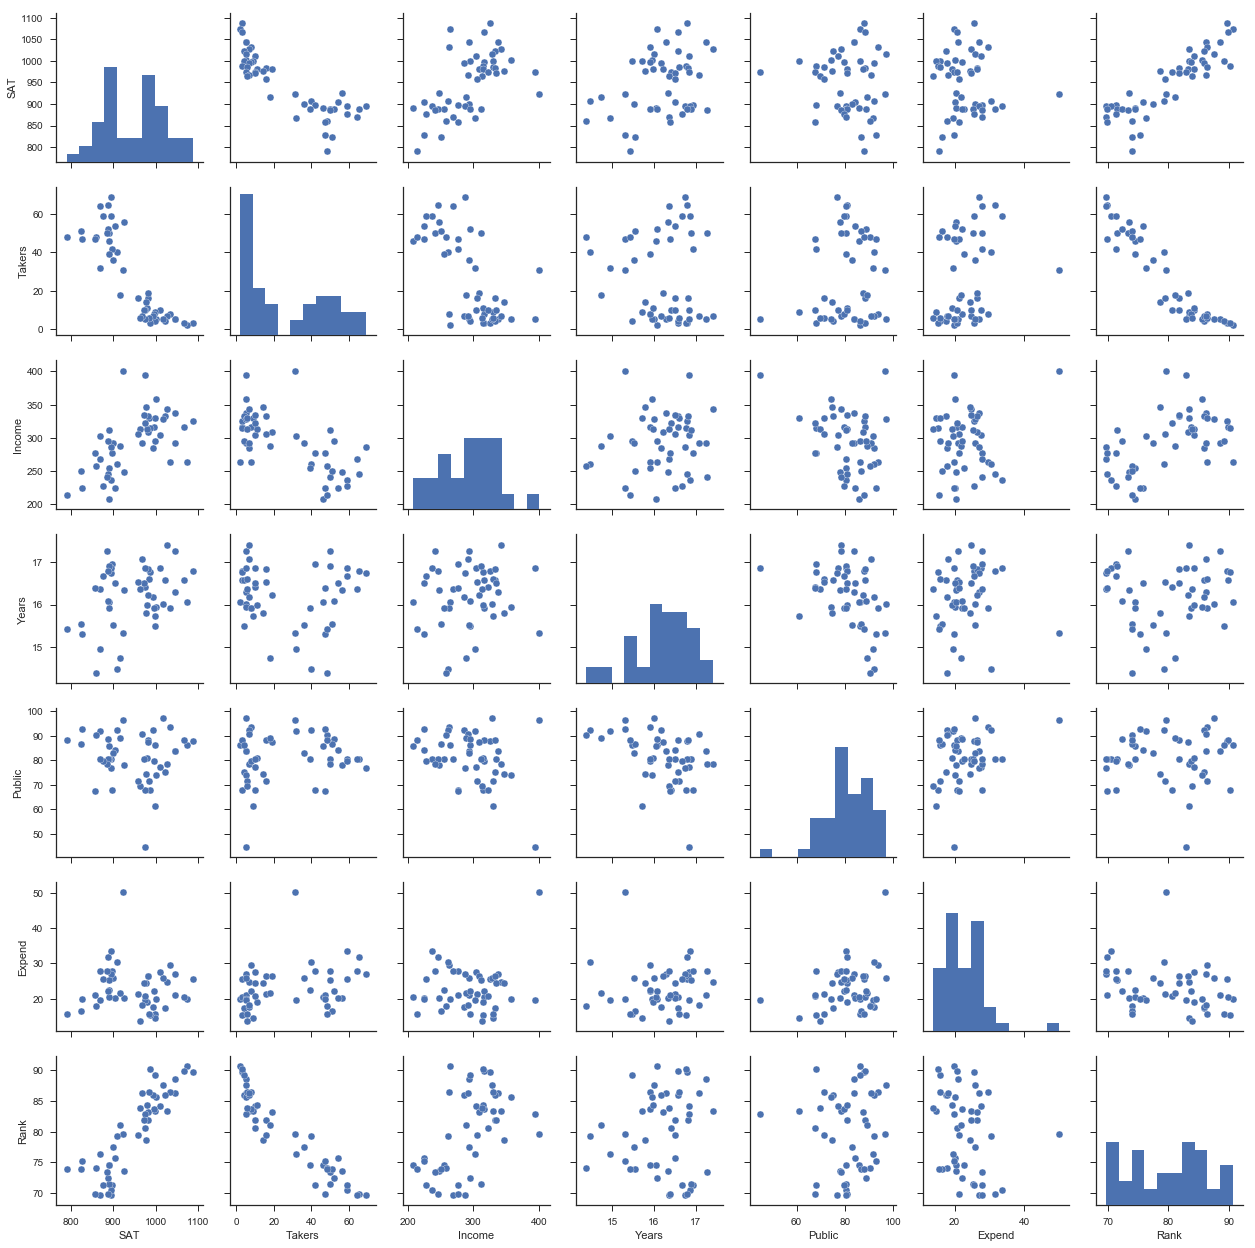

In [11]:
sns.set(style="ticks")
sns.pairplot(df)

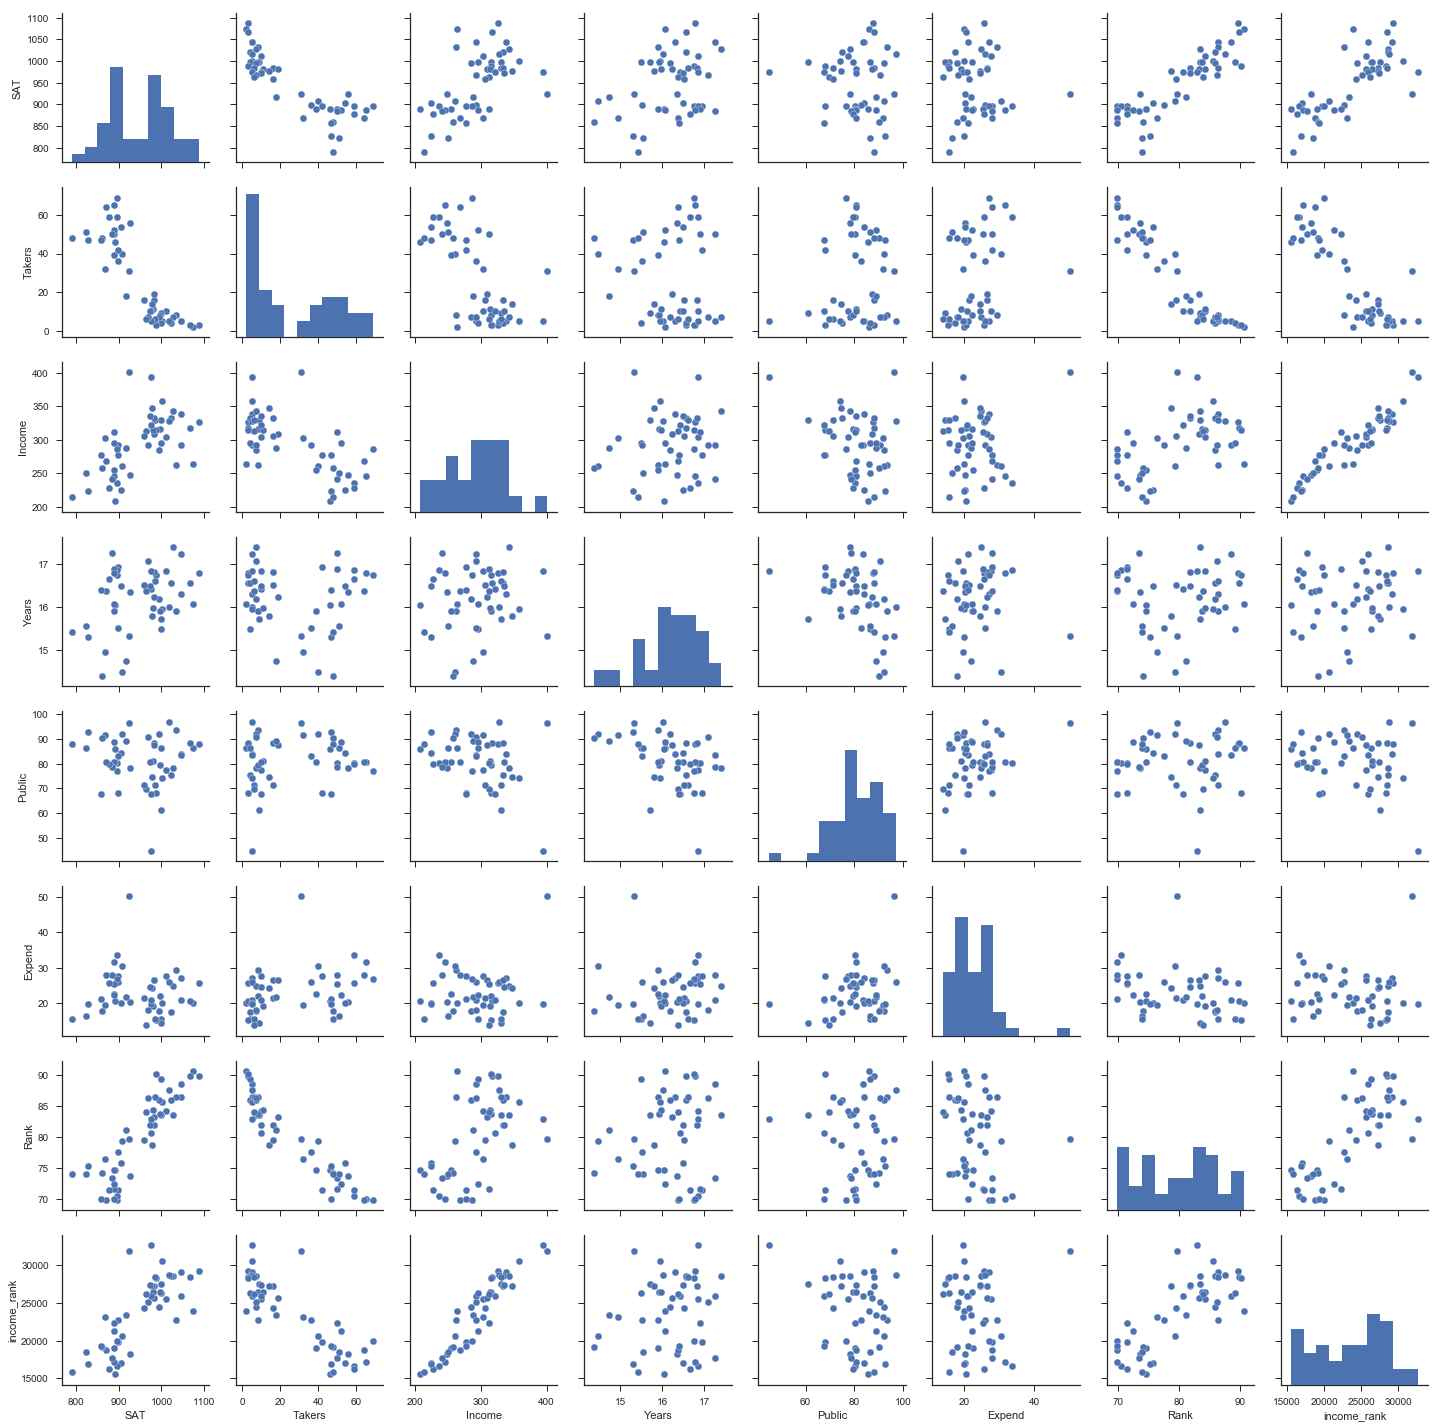

In [12]:
df['income_rank'] = np.multiply(df['Income'],df['Rank'])
sns.pairplot(df)

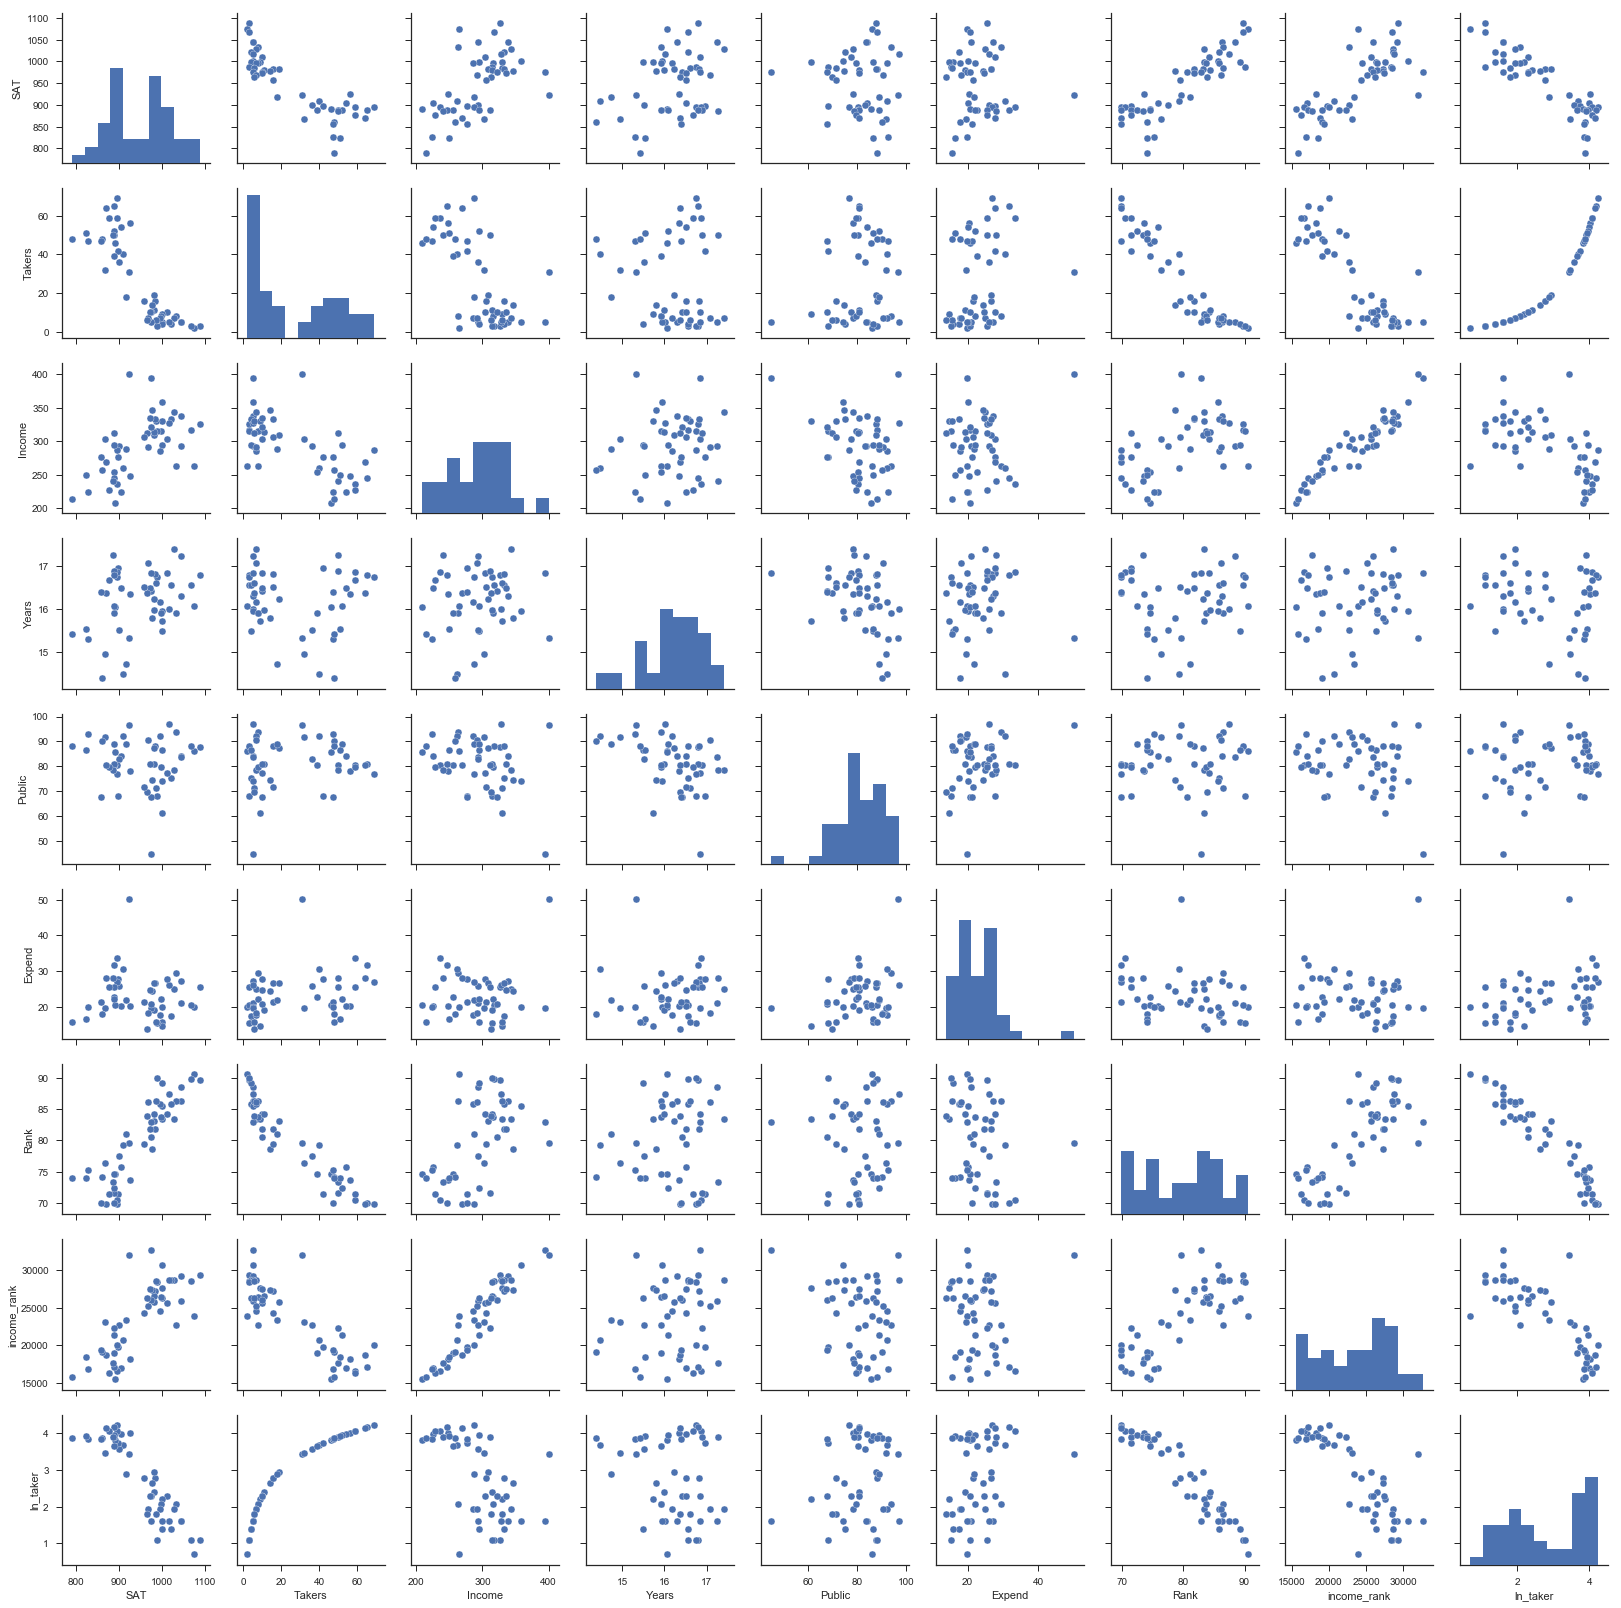

In [13]:
df['ln_taker'] = np.log(df.Takers)
sns.pairplot(df)

# Normal distribution checking

In [14]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot

SAT = df['SAT']
Takers = df['Takers']
Income = df['Income']
Years = df['Years']
Public = df['Public']
Expend = df['Expend']
Rank = df['Rank']


def interpret(sig_level, p_value):
    if p > sig_level:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')



### SAT

(array([ 1.,  2.,  5., 12.,  3.,  3., 11.,  7.,  3.,  3.]),
 array([ 790. ,  819.8,  849.6,  879.4,  909.2,  939. ,  968.8,  998.6,
        1028.4, 1058.2, 1088. ]),
 <a list of 10 Patch objects>)

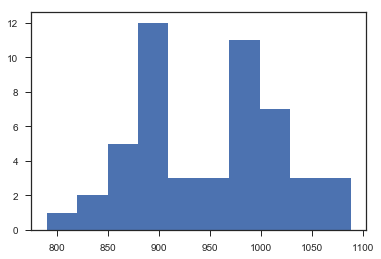

In [15]:
## histogram plot
plt.hist(SAT)

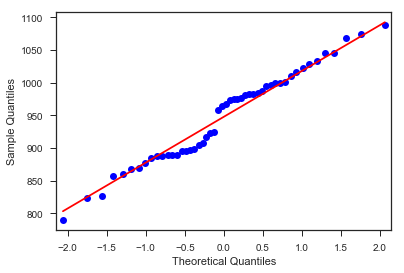

In [16]:
## Quantile-Quantile plot
qqplot(SAT, line='s')
plt.show()

In [17]:
## using Shapiro-Wilk Test
stat, p = shapiro(SAT)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.969, p=0.218


In [18]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


In [19]:
## D’Agostino’s K^2 Test
stat, p = normaltest(SAT)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2.270, p=0.321


In [20]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


# Correlation test

In [21]:
from scipy.stats import pearsonr
from scipy.stats import linregress

def correlation_interpret(sig_level, p_value):
    if p > sig_level:
        print('There is no correlation between 2 variables (fail to reject H0: p=0)')
    else:
        print('There is correlation between 2 varables at alpha=%.3f (reject H0: p=0)' %(sig_level))

### SAT - Income

In [22]:
r, p = pearsonr(Income, SAT)
print("pearson's coefficient=%.3f, p-value=%.3f" % (r, p))

correlation_interpret(0.05, p)

pearson's coefficient=0.584, p-value=0.000
There is correlation between 2 varables at alpha=0.050 (reject H0: p=0)


In [23]:
slope, intercept, r_value, p_value, std_err = linregress(Income, SAT)
print("slope=%.3f, intercept=%.3f, correlation=%.3f, p-value=%.3f, std-err=%.3f" % (slope, intercept, r_value, p_value, std_err))

slope=0.948, intercept=669.299, correlation=0.584, p-value=0.000, std-err=0.190


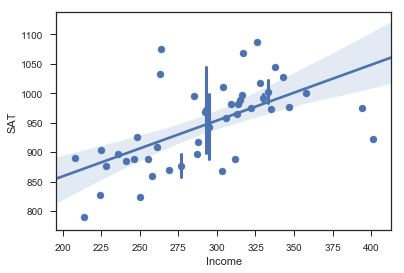

In [24]:
sns.regplot(x="Income", y="SAT", data=df, x_estimator=np.mean);

### SAT - Years

In [25]:
r, p = pearsonr(Years, SAT)
print("pearson's coefficient=%.3f, p-value=%.3f" % (r, p))

correlation_interpret(0.05, p)

pearson's coefficient=0.331, p-value=0.019
There is correlation between 2 varables at alpha=0.050 (reject H0: p=0)


In [26]:
slope, intercept, r_value, p_value, std_err = linregress(Years, SAT)
print("slope=%.3f, intercept=%.3f, correlation=%.3f, p-value=%.3f, std-err=%.3f" % (slope, intercept, r_value, p_value, std_err))

slope=33.503, intercept=404.889, correlation=0.331, p-value=0.019, std-err=13.787


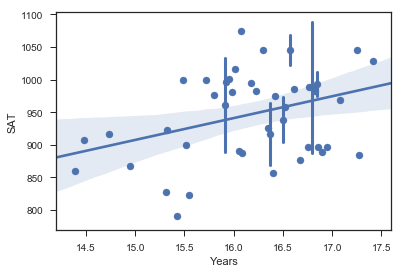

In [27]:
sns.regplot(x="Years", y="SAT", data=df, x_estimator=np.mean);

### SAT - Takers

In [28]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr

def tau_interpret(sig_level, p_value):
    if p_value > sig_level:
        print('There is no correlation between 2 variables (fail to reject H0: tau=0)')
    else:
        print('There is correlation between 2 varables at alpha=%.3f (reject H0: tau=0)' %(sig_level))
        
def spearman_interpret(sig_level, p_value):
    if p_value > sig_level:
        print('There is no correlation between 2 variables (fail to reject H0: ps=0)')
    else:
        print('There is correlation between 2 varables at alpha=%.3f (reject H0: ps=0)' %(sig_level))

In [29]:
tau, p_value = kendalltau(Takers, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=-0.6612, p-value=0.0000


In [30]:
tau_interpret(0.05, p_value)

There is correlation between 2 varables at alpha=0.050 (reject H0: tau=0)


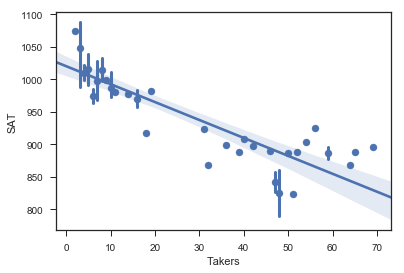

In [31]:
sns.regplot(x="Takers", y="SAT", data=df, x_estimator=np.mean);

 ### SAT - Public

In [32]:
tau, p_value = kendalltau(Public, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=-0.0312, p-value=0.7505


In [33]:
tau_interpret(0.05, p_value)

There is no correlation between 2 variables (fail to reject H0: tau=0)


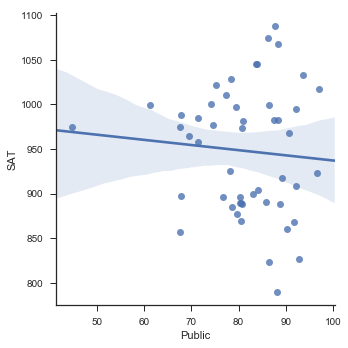

In [34]:
sns.lmplot(x="Public", y="SAT", data=df);

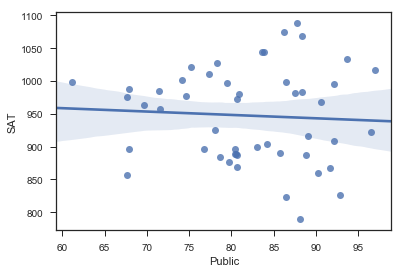

In [35]:
df_lus = pd.read_csv("./case1201-no-louisiana.csv")
sns.regplot(x="Public", y="SAT", data=df_lus);

### SAT - Expend

In [36]:
tau, p_value = spearmanr(Expend, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=-0.0493, p-value=0.7340


In [37]:
tau_interpret(0.05, p_value)

There is no correlation between 2 variables (fail to reject H0: tau=0)


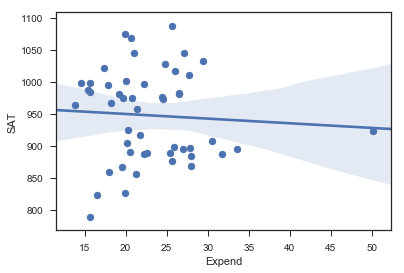

In [38]:
sns.regplot(x="Expend", y="SAT", data=df, x_estimator=np.mean);

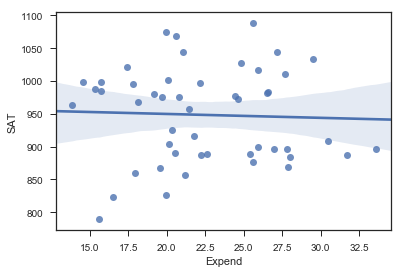

In [39]:
df_lus = pd.read_csv("./case1201-no-alaska.csv")
df_lus.head(8)
sns.regplot(x="Expend", y="SAT", data=df_lus);

### SAT - Rank

In [40]:
tau, p_value = kendalltau(Rank, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=0.6932, p-value=0.0000


In [41]:
tau_interpret(0.05, p_value)

There is correlation between 2 varables at alpha=0.050 (reject H0: tau=0)


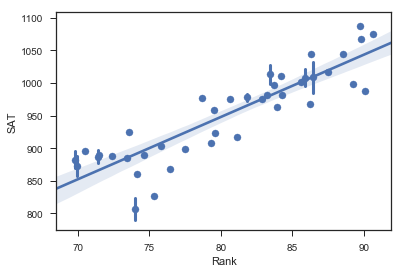

In [42]:
sns.regplot(x="Rank", y="SAT", data=df, x_estimator=np.mean);

# Linear Regression

In [43]:
from sklearn import linear_model
import statsmodels.api as sm

In [44]:
def print_sumsquare_detail(model):
    print("\n==============================================================================")
    print("SS regression:%.4f, mse-regress:%.4f" %(model.mse_model * model.df_model, model.mse_model))
    print("SS residual:%.4f, mse-resid:%.4f" %(model.ssr, model.mse_resid))
    print("std.error of estimate:", model.mse_resid ** (1/2))
    print("==============================================================================\n")

In [45]:
X = df[['Takers', 'Income', 'Years', 'Public', 'Expend', 'Rank']]
Y = df['SAT']

In [46]:
#sklearn utilities
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('intercept:%.3f' %(regr.intercept_))
print('Takers(x1):', regr.coef_[0])
print('Income(x2):', regr.coef_[1])
print('Years(x3):', regr.coef_[2])
print('Public(x4):', regr.coef_[3])
print('Expend(x5):', regr.coef_[4])
print('Rank(x6):', regr.coef_[5])
print('equation: %.4f + (%.4f)X1 + (%.4f)X2 + (%.4f)X3 + (%.4f)X4 + (%.4f)X5 + (%.4f)X6' 
      %(regr.intercept_, regr.coef_[0], regr.coef_[1], regr.coef_[2], regr.coef_[3],regr.coef_[4], regr.coef_[5]))

intercept:-94.659
Takers(x1): -0.48008012043048925
Income(x2): -0.008195013427468747
Years(x3): 22.610081908487437
Public(x4): -0.4641522922938623
Expend(x5): 2.212004850023485
Rank(x6): 8.476216984757038
equation: -94.6591 + (-0.4801)X1 + (-0.0082)X2 + (22.6101)X3 + (-0.4642)X4 + (2.2120)X5 + (8.4762)X6


In [47]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
print_sumsquare_detail(model)

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           4.16e-18
Time:                        21:03:13   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.6591    211.510     -0.448      0.6

In [48]:
X2 = df[['Years', 'Expend', 'Rank']]
Y2 = df['SAT']

X2 = sm.add_constant(X2) # adding a constant
 
model = sm.OLS(Y2, X2).fit()
predictions = model.predict(X2) 
 
print_model = model.summary()
print(print_model)
print_sumsquare_detail(model)

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     103.6
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           1.76e-20
Time:                        21:03:13   Log-Likelihood:                -232.25
No. Observations:                  50   AIC:                             472.5
Df Residuals:                      46   BIC:                             480.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -303.7243     97.842     -3.104      0.0

In [49]:
X3 = df[['Takers', 'Years', 'Expend', 'Rank']]
Y3 = df['SAT']

X3 = sm.add_constant(X3) # adding a constant
 
model = sm.OLS(Y3, X3).fit()
predictions = model.predict(X3) 
 
print_model = model.summary()
print(print_model)
print("mse:", model.mse_model ** (1/2))

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     79.97
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           7.33e-20
Time:                        21:03:13   Log-Likelihood:                -231.15
No. Observations:                  50   AIC:                             472.3
Df Residuals:                      45   BIC:                             481.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -89.6362    178.740     -0.501      0.6

In [50]:
X4 = df[['Takers', 'Years', 'Expend', 'Rank','income_rank']]
Y4 = df['SAT']

X4 = sm.add_constant(X4) # adding a constant
 
model = sm.OLS(Y4, X4).fit()
predictions = model.predict(X4) 
 
print_model = model.summary()
print(print_model)
print("mse:", model.mse_model ** (1/2))

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     62.62
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           6.90e-19
Time:                        21:03:13   Log-Likelihood:                -231.13
No. Observations:                  50   AIC:                             474.3
Df Residuals:                      44   BIC:                             485.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -101.5156    190.451     -0.533      

In [51]:
# df['predict'] = df.apply (lambda row: y_predict (row),axis=1)
df['predict'] = predictions
df['residual'] = np.subtract(df['SAT'], df['predict'])

In [52]:
df.head(10)

,State,SAT,Takers,Income,Years,Public,Expend,Rank,income_rank,ln_taker,predict,residual
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7,29242.2,1.098612,1058.180219,29.819781
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6,23918.4,0.693147,1034.975480,40.024520
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8,28466.6,1.098612,1043.684216,24.315784
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3,29169.4,1.609438,1021.661974,23.338026
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5,25930.5,1.609438,1049.575383,-4.575383
5,Montana,1033,8,263,15.91,93.7,29.48,86.4,22723.2,2.079442,1012.879046,20.120954
6,Minnesota,1028,7,343,17.41,78.3,24.84,83.4,28606.2,1.945910,1021.734723,6.265277
7,Utah,1022,4,333,16.57,75.2,17.42,85.9,28604.7,1.386294,1007.424813,14.575187
8,Wyoming,1017,5,328,16.01,97.0,25.96,87.5,28700.0,1.609438,1021.067679,-4.067679
9,Wisconsin,1011,10,304,16.85,77.3,27.69,84.2,25596.8,2.302585,1016.142070,-5.142070


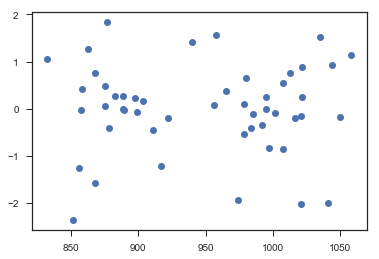

In [53]:
plt.plot(predictions, model.resid_pearson, 'o')

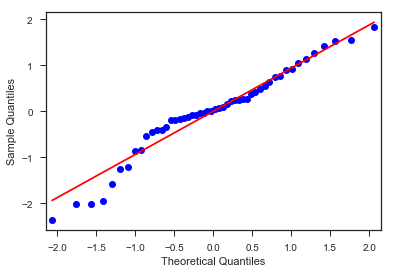

In [54]:
residual = model.resid_pearson
qqplot(residual, line='s')
plt.show()

In [55]:
## using Shapiro-Wilk Test
stat, p = shapiro(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.958, p=0.073


In [56]:
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


In [57]:
def y_predict(row):
    #since const is not significant so drop it.
    return 8.1458 * row['Takers'] + 16.6565 * row['Years'] + 2.2231 * row['Expend'] + 8.0703 * row['Rank'] + (-0.1244 * row['taker_rank'])

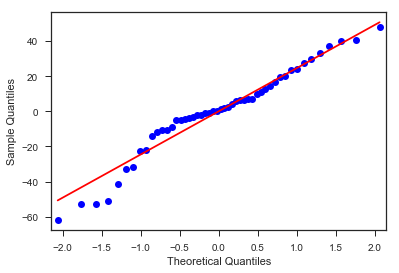

In [58]:
qqplot(df['residual'], line='s')
plt.show()

In [61]:
X5 = df[['Takers', 'Years', 'Expend', 'ln_taker']]
Y5 = df['SAT']

X5 = sm.add_constant(X5) # adding a constant
 
model = sm.OLS(Y5, X5).fit()
model.conf_int(alpha=0.05, cols=None)
predictions = model.predict(X5) 
 
print_model = model.summary()
print(print_model)
print_sumsquare_detail(model)


                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     85.20
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           2.11e-20
Time:                        21:04:19   Log-Likelihood:                -229.76
No. Observations:                  50   AIC:                             469.5
Df Residuals:                      45   BIC:                             479.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        829.4400     97.500      8.507      0.0

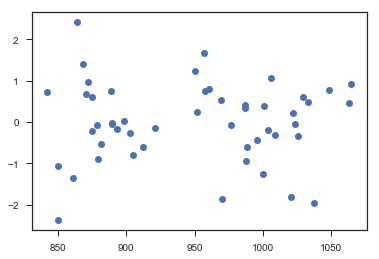

In [62]:
plt.plot(predictions, model.resid_pearson, 'o')

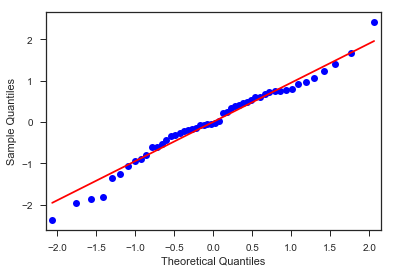

In [63]:
residual = model.resid_pearson
qqplot(residual, line='s')
plt.show()

In [64]:
model.resid_pearson

array([ 0.91718603,  0.46967859,  0.76923134,  0.48429349,  0.60988125,
        1.06048566,  0.22636829, -0.06008544, -0.34275389,  0.38950306,
       -0.32333655, -0.2042497 ,  1.66180045,  0.39733033,  0.3291189 ,
       -1.94799688, -0.43455922,  0.53080378,  1.23899864,  0.79931435,
        0.75743039, -1.8048951 , -0.07577404, -0.60082755, -1.26683344,
       -0.94097108,  0.24952029,  2.41007617, -1.85388422, -0.15354834,
        0.74696379,  1.40966931,  0.02368713, -0.61581605,  0.96012769,
       -0.2601703 ,  0.60967329, -0.02110657, -0.17136255,  0.67990487,
       -0.06007801, -0.80144031, -0.06773969, -0.22703799, -0.53042208,
        0.7171729 , -0.8972727 , -1.35746098, -1.05971088, -2.36888641])

In [66]:
df_alas = pd.read_csv("./case1201-no-alaska.csv")


X_alas = df_alas[['Rank', 'Expend', 'Years', 'Income']]
Y_alas = df_alas['SAT']

X_alas = sm.add_constant(X_alas) # adding a constant
 
model = sm.OLS(Y_alas, X_alas).fit()
model.conf_int(alpha=0.05, cols=None)
predictions = model.predict(X_alas) 
 
print_model = model.summary()
print(print_model)
print_sumsquare_detail(model)

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     101.6
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           1.24e-21
Time:                        21:06:15   Log-Likelihood:                -221.25
No. Observations:                  49   AIC:                             452.5
Df Residuals:                      44   BIC:                             462.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -255.2894     88.607     -2.881      0.0

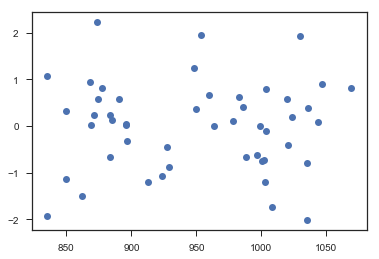

In [67]:
plt.plot(predictions, model.resid_pearson, 'o')

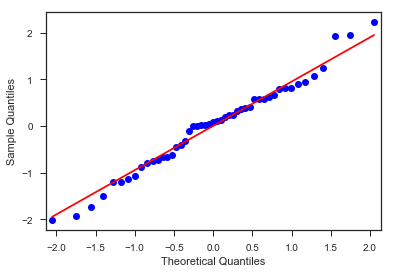

In [68]:
residual = model.resid_pearson
qqplot(residual, line='s')
plt.show()